In [17]:
import csv 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import numpy as np

In [2]:
dataset = [ [],[],[],[],[]]

In [3]:
measurements = ['sepal length', 'sepal width', 'petal length', 'petal widht']

In [15]:
iris_types = set(dataset[4])

In [6]:
with open('iris.csv') as f:
    reader = csv.reader(f)
    next(reader)  # Skip the header row
    for row in reader:
        if len(row) == 5:
            for i in range(4):
                dataset[i].append(float(row[i]))
            dataset[4].append(row[4])

In [7]:
def mean(x):
    return sum(x)/len(x)

In [13]:
def std(x):
    u = mean(x)
    return (mean([(x_i - u) ** 2 for x_i in x])) ** 0.5

In [14]:
for i, m in enumerate(measurements):
    print(f"{m}: mean {mean(dataset[i]):.4f}, std {std(dataset[i]):.4f}")

sepal length: mean 5.8433, std 0.8253
sepal width: mean 3.0573, std 0.4344
petal length: mean 3.7580, std 1.7594
petal widht: mean 1.1993, std 0.7597


In [16]:
for i, m in enumerate(measurements):
    print(m)
    for iris_type in iris_types:
        values = [v for v, t in zip(dataset[i], dataset[4]) if t == iris_type]
        print(f"  {iris_type}: mean {mean(values):.4f}, std {std(values):.4f}")
    print()

sepal length
  Virginica: mean 6.5880, std 0.6295
  Setosa: mean 5.0060, std 0.3489
  Versicolor: mean 5.9360, std 0.5110

sepal width
  Virginica: mean 2.9740, std 0.3193
  Setosa: mean 3.4280, std 0.3753
  Versicolor: mean 2.7700, std 0.3106

petal length
  Virginica: mean 5.5520, std 0.5463
  Setosa: mean 1.4620, std 0.1719
  Versicolor: mean 4.2600, std 0.4652

petal widht
  Virginica: mean 2.0260, std 0.2719
  Setosa: mean 0.2460, std 0.1043
  Versicolor: mean 1.3260, std 0.1958



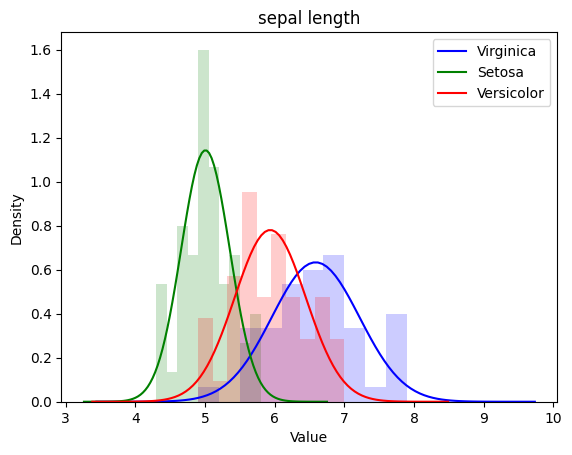

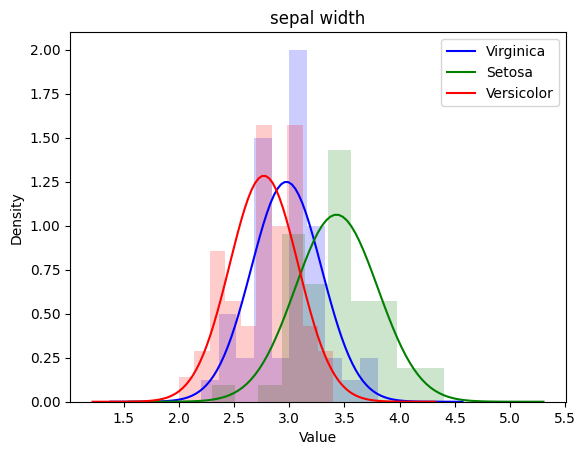

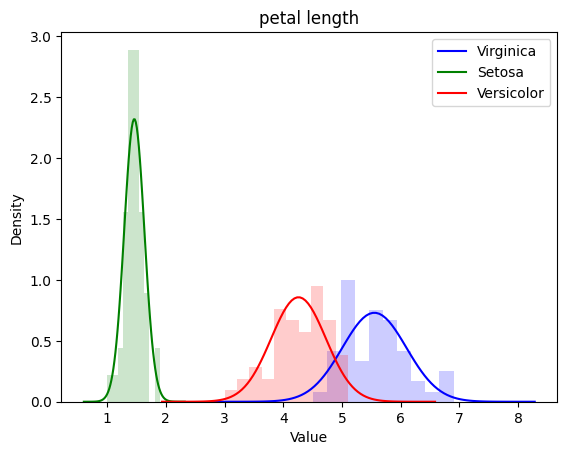

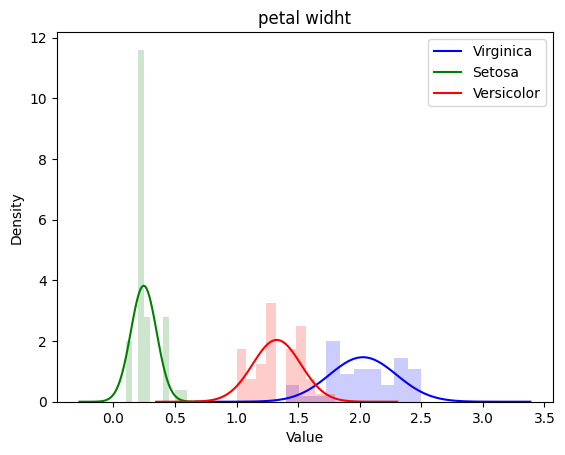

In [19]:
colors = ['b', 'g', 'r']
for i, m in enumerate(measurements):
    plt.figure()
    plt.title(m)
    
    for iris_type, color in zip(iris_types, colors):
        values = [v for v, t in zip(dataset[i], dataset[4]) if t == iris_type]
        
        plt.hist(values, density=True, alpha=0.2, color=color)
        
        u = mean(values)
        s = std(values)
        
        x = np.linspace(u - 5 * s, u + 5 * s, 100)
        
        plt.plot(x, norm.pdf(x, u, s), label=iris_type, color=color)
    
    plt.legend() 
    plt.xlabel("Value") 
    plt.ylabel("Density") 

plt.show()